In [2]:
import pandas as pd

In [3]:
#Read data
parameters = ['AC Operator', 'Actual Distance Flown (nm)']
parquet_para = ['CO2', 'Ac Operator'] #Add other emissions later

# ---- MARCH -----
month1 = 'march'
month1num = '03'

#Distance
m1 = pd.read_csv(f"eurocontrol-data/2015/2015{month1num}/Flights_2015{month1num}01_2015{month1num}31.csv")
m2 = pd.read_csv(f"eurocontrol-data/2016/2016{month1num}/Flights_2016{month1num}01_2016{month1num}31.csv")
m3 = pd.read_csv(f"eurocontrol-data/2017/2017{month1num}/Flights_2017{month1num}01_2017{month1num}31.csv")
m4 = pd.read_csv(f"eurocontrol-data/2018/2018{month1num}/Flights_2018{month1num}01_2018{month1num}31.csv")

#Emissions
m1e = pd.read_parquet(f"reduced-parquet/2015-{month1}-red.parquet")
m2e = pd.read_parquet(f"reduced-parquet/2016-{month1}-red.parquet")
m3e = pd.read_parquet(f"reduced-parquet/2017-{month1}-red.parquet")
m4e = pd.read_parquet(f"reduced-parquet/2018-{month1}-red.parquet")

# ---- SEPTEMBER -----
month1 = 'september'
month1num = '09'

#Distance
s1 = pd.read_csv(f"eurocontrol-data/2015/2015{month1num}/Flights_2015{month1num}01_2015{month1num}30.csv")
s2 = pd.read_csv(f"eurocontrol-data/2016/2016{month1num}/Flights_2016{month1num}01_2016{month1num}30.csv")
s3 = pd.read_csv(f"eurocontrol-data/2017/2017{month1num}/Flights_2017{month1num}01_2017{month1num}30.csv")
s4 = pd.read_csv(f"eurocontrol-data/2018/2018{month1num}/Flights_2018{month1num}01_2018{month1num}30.csv")

#Emissions
s1e = pd.read_parquet(f"reduced-parquet/2015-{month1}-red.parquet")
s2e = pd.read_parquet(f"reduced-parquet/2016-{month1}-red.parquet")
s3e = pd.read_parquet(f"reduced-parquet/2017-{month1}-red.parquet")
s4e = pd.read_parquet(f"reduced-parquet/2018-{month1}-red.parquet")



In [4]:
# --- Distance ---

# --- March ---
m1dist = m1[parameters].groupby('AC Operator').sum()
m2dist = m2[parameters].groupby('AC Operator').sum()
m3dist = m3[parameters].groupby('AC Operator').sum()
m4dist = m4[parameters].groupby('AC Operator').sum()

# Total in all months
marchdist = pd.concat([m1dist, m2dist, m3dist, m4dist])
marchdist.reset_index('AC Operator', inplace=True)
totalmarchdist = marchdist.groupby('AC Operator').sum().sort_values('Actual Distance Flown (nm)', ascending=False)
totalmarchdist['Actual Distance Flown (nm)'] = totalmarchdist['Actual Distance Flown (nm)']/4
totalmarchdist.sort_values('Actual Distance Flown (nm)', ascending=False)
samplemarchdist = totalmarchdist.head(30)

# --- September ---
s1dist = s1[parameters].groupby('AC Operator').sum()
s2dist = s2[parameters].groupby('AC Operator').sum()
s3dist = s3[parameters].groupby('AC Operator').sum()
s4dist = s4[parameters].groupby('AC Operator').sum()

# Total in all months
septdist = pd.concat([s1dist, s2dist, s3dist, s4dist])
septdist.reset_index('AC Operator', inplace=True)
totalseptdist = septdist.groupby('AC Operator').sum().sort_values('Actual Distance Flown (nm)', ascending=False)
totalseptdist['Actual Distance Flown (nm)'] = totalseptdist['Actual Distance Flown (nm)']/4
totalseptdist.sort_values('Actual Distance Flown (nm)', ascending=False)
sampleseptdist = totalseptdist.head(30)

print(sampleseptdist)

             Actual Distance Flown (nm)
AC Operator                            
RYR                         44709422.75
THY                         41839600.25
ZZZ                         40225054.75
DLH                         38068717.00
BAW                         33933654.25
AFR                         29972497.75
EZY                         28922221.25
KLM                         21320277.00
UAE                         18727304.50
UAL                         17079241.25
DAL                         16808411.00
QTR                         16676758.00
SAS                         15341016.75
AAL                         13945756.50
AZA                         12294576.75
TAP                         11475292.75
WZZ                         11305204.50
VLG                         11117603.50
AFL                         11026758.00
SWR                         11019896.00
IBE                         10715809.50
TOM                         10440835.25
NAX                          9900710.75


In [5]:
# --- Emissions ---

# --- March ---
m1emis = m1e[parquet_para].groupby('Ac Operator').sum()
m2emis = m2e[parquet_para].groupby('Ac Operator').sum()
m3emis = m3e[parquet_para].groupby('Ac Operator').sum()
m4emis = m4e[parquet_para].groupby('Ac Operator').sum()

marchemis = pd.concat([m1emis, m2emis, m3emis, m4emis])
marchemis.reset_index('Ac Operator', inplace=True)
marchemis.rename(columns = {'Ac Operator':'AC Operator'}, inplace = True)
totalmarchemis= marchemis.groupby('AC Operator').sum().sort_values('CO2', ascending=False)
totalmarchemis['CO2'] = totalmarchemis['CO2']/1000000 # get million kg
totalmarchemis['CO2'] = totalmarchemis['CO2']/4 # get average
samplemarchemis = totalmarchemis.head(40)

#Code for other
#other_emissions = totalmarchemis.iloc[19:].sum()
#other_emissions.name = 'Other'
#samplemarchemis = samplemarchemis.append(other_emissions.transpose())
#print(samplemarchemis)

# --- September ---
s1emis = s1e[parquet_para].groupby('Ac Operator').sum()
s2emis = s2e[parquet_para].groupby('Ac Operator').sum()
s3emis = s3e[parquet_para].groupby('Ac Operator').sum()
s4emis = s4e[parquet_para].groupby('Ac Operator').sum()

septemis = pd.concat([s1emis, s2emis, s3emis, s4emis])
septemis.reset_index('Ac Operator', inplace=True)
septemis.rename(columns = {'Ac Operator':'AC Operator'}, inplace = True)
totalseptemis= septemis.groupby('AC Operator').sum().sort_values('CO2', ascending=False)
totalseptemis['CO2'] = totalseptemis['CO2']/1000000 # get million kg
totalseptemis['CO2'] = totalseptemis['CO2']/4 # get average
sampleseptemis = totalseptemis.head(40)

#Code for other
#other_emissions = totalmarchemis.iloc[19:].sum()
#other_emissions.name = 'Other'
#samplemarchemis = samplemarchemis.append(other_emissions.transpose())
print(sampleseptemis)

                       CO2
AC Operator               
RYR          969187.476478
THY          895795.124424
UAE          692408.590496
DLH          657936.856605
BAW          656060.107774
EZY          557055.405607
ZZZ          541946.364359
AFR          497811.219205
QTR          372843.692888
KLM          370334.709591
AFL          227069.051382
TOM          219015.005971
SAS          218900.868842
WZZ          217188.491980
AZA          216075.501607
VLG          213082.380305
ETD          201429.420245
SWR          177492.473496
UAL          176982.757201
NAX          175402.572167
PGT          171687.138481
AAL          148955.756883
BER          144779.625418
DAL          144493.606581
TAP          139913.754207
EXS          134662.882476
ELY          132571.366059
SVA          129326.795441
TCX          126830.232711
FIN          126041.045870
AUA          115314.581620
TRA          114930.172449
SIA          109427.623332
EWG          108253.129316
IBE          108015.033712
S

In [6]:
#Get average emissions
#--March--
final = pd.merge(samplemarchdist, samplemarchemis, on="AC Operator", how="left")
final.rename(columns = {'Actual Distance Flown (nm)':'Distance'}, inplace = True)
final['avg emission'] = final['CO2']*1000000/final['Distance']
final.sort_values('Distance')
final['Month'] = 'March'
final2 = final.head(15)
#final2.reset_index('AC Operator', inplace=True)
#print(final2)

#--September--
septfinal = pd.merge(sampleseptdist, sampleseptemis, on="AC Operator", how="left")
septfinal.rename(columns = {'Actual Distance Flown (nm)':'Distance'}, inplace = True)
septfinal['avg emission'] = septfinal['CO2']*1000000/septfinal['Distance']
septfinal.sort_values('Distance')
septfinal['Month'] = 'Sept'
septfinal2 = septfinal.head(15)
#septfinal2.reset_index('AC Operator', inplace=True)
#print(septfinal2)

#sample = pd.merge(final2, septfinal2, on="AC Operator", how='left', suffixes=('_m', '_s'))
sample=pd.concat([final2, septfinal2], axis=0)
sample.reset_index('AC Operator', inplace=True)
print(sample)

   AC Operator     Distance            CO2  avg emission  Month
0          THY  36949362.50  700963.406134  18970.920165  March
1          DLH  34392030.00  556598.172398  16183.929021  March
2          RYR  34364583.25  698468.146114  20325.232552  March
3          BAW  32425731.00  599895.453936  18500.599229  March
4          AFR  28448839.75  448687.564010  15771.735085  March
5          ZZZ  24991584.75  259877.466143  10398.598918  March
6          EZY  21882723.50  396665.892801  18126.897815  March
7          KLM  19958421.00  334542.116209  16761.953073  March
8          UAE  18822769.75  654489.154097  34771.139571  March
9          QTR  15787271.25  312730.163657  19809.006807  March
10         UAL  13676741.50  129907.787453   9498.445770  March
11         SAS  13652214.50  181478.867159  13292.998521  March
12         DAL  11668245.25   89974.629132   7711.067706  March
13         SWR  10536569.50  158703.534499  15062.163686  March
14         AZA  10200731.25  170983.8756

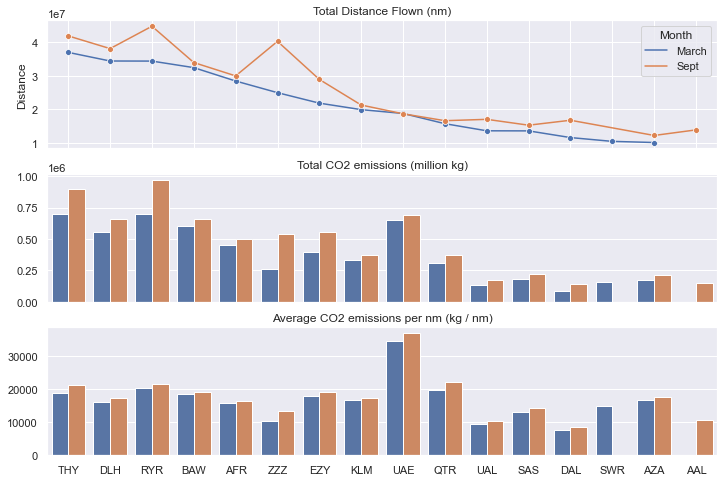

In [21]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
axes[0].set_title('Total Distance Flown (nm)')
axes[1].set_title('Total CO2 emissions (million kg)')
axes[2].set_title('Average CO2 emissions per nm (kg / nm)')

f2 = sns.lineplot(data=sample, x='AC Operator', y='Distance', hue='Month', ax=axes[0], marker='o')
f1.set(xlabel = None, ylabel=None)

f2 = sns.barplot(data=sample, x='AC Operator', y='CO2', hue='Month', ax=axes[1])
f2.set(xlabel=None, ylabel=None)
f2.legend_.remove()

f3 = sns.barplot(data=sample, x='AC Operator', y='avg emission', hue='Month', ax=axes[2])
f3.set(xlabel=None, ylabel=None)
f3.legend_.remove()

